In [ ]:
from google.colab import files

# Subir el archivo
uploaded = files.upload()


KeyboardInterrupt: 

In [ ]:
#Se modifica código para análisis exploratorio del dataset (estadísticas descriptivas, gráficos) y la visualización de los resultados (precisión durante el entrenamiento y matriz de confusión).

In [ ]:
import pandas as pd

# Cargar el archivo iris.data
iris_data = pd.read_csv('iris.data', header=None)

# Ver las primeras filas del dataset
print(iris_data.head())


FileNotFoundError: [Errno 2] No such file or directory: 'iris.data'

In [ ]:
# Leer el archivo iris.names para ver las descripciones
with open('iris.names', 'r') as file:
    iris_names = file.read()

# Mostrar el contenido
print(iris_names)


1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for t

In [ ]:
# Análisis exploratorio del dataset
print("\nEstadísticas descriptivas del dataset:")
print(iris_data.describe())  # Estadísticas descriptivas básicas



Estadísticas descriptivas del dataset:
                0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000


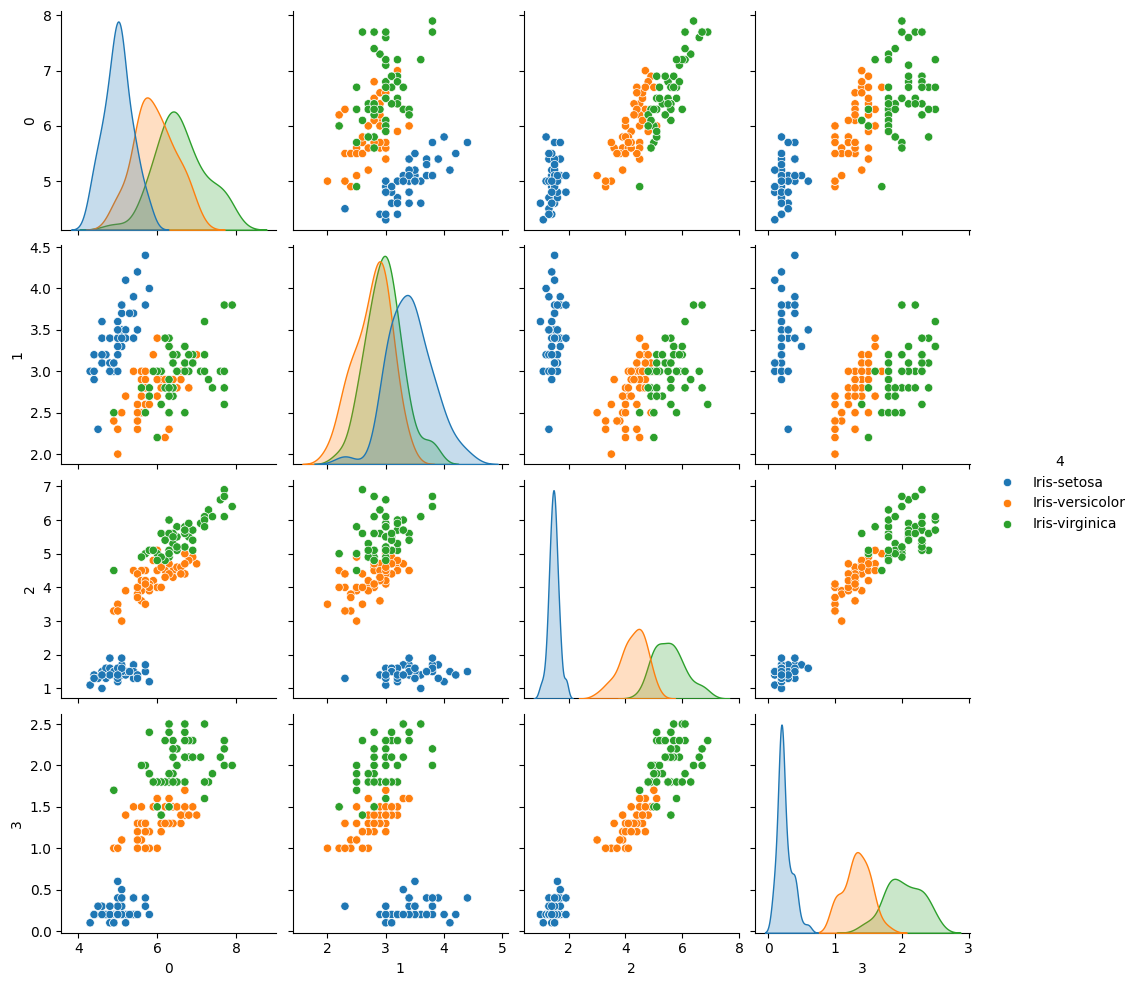

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualización de la distribución de las características
sns.pairplot(iris_data, hue=4)  # Usar la columna de clase para colorear
plt.show()

# Dividir el dataset en características y etiquetas
X = iris_data.iloc[:, :-1]  # Las primeras 4 columnas son las características
y = iris_data.iloc[:, -1]   # La última columna es el rótulo


In [ ]:
# Convertir las etiquetas a números
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Ver las características y etiquetas
print("\nPrimeras 5 características:")
print(X.head())
print("\nPrimeras 5 etiquetas convertidas a números:")
print(y[:5])


Primeras 5 características:
     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2

Primeras 5 etiquetas convertidas a números:
[0 0 0 0 0]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Crear la red neuronal
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))  # Capa oculta con 10 neuronas
model.add(Dense(3, activation='softmax'))  # Capa de salida para 3 clases

# Compilar el modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1, validation_data=(X_test, y_test))


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3314 - loss: 1.1385 - val_accuracy: 0.3000 - val_loss: 1.0680
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4397 - loss: 0.9871 - val_accuracy: 0.5000 - val_loss: 0.9796
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4922 - loss: 0.9442 - val_accuracy: 0.4667 - val_loss: 0.9269
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4718 - loss: 0.9199 - val_accuracy: 0.5667 - val_loss: 0.8851
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6100 - loss: 0.8702 - val_accuracy: 0.7333 - val_loss: 0.8516
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8097 - loss: 0.8564 - val_accuracy: 0.9000 - val_loss: 0.8219
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8043 - loss: 0.8127 - val_accuracy: 0.9333 - val_loss: 0.7985
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8030 - loss: 0.8049 - val_accuracy: 0.8667 - 

In [ ]:
# Evaluar el modelo
accuracy = model.evaluate(X_test, y_test)
print(f'\nAccuracy en conjunto de prueba: {accuracy[1]*100:.2f}%')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 1.0000 - loss: 0.2098

Accuracy en conjunto de prueba: 100.00%


In [ ]:
# Hacer predicciones con el modelo
predictions = model.predict(X_test)

# Mostrar las primeras predicciones
for i in range(5):
    # `argmax()` nos da la clase con la mayor probabilidad
    pred_label = le.inverse_transform([predictions[i].argmax()])
    real_label = le.inverse_transform([y_test[i]])  # Acceder directamente al valor con índice
    print(f"Predicción: {pred_label[0]} | Real: {real_label[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicción: Iris-versicolor | Real: Iris-versicolor
Predicción: Iris-setosa | Real: Iris-setosa
Predicción: Iris-virginica | Real: Iris-virginica
Predicción: Iris-versicolor | Real: Iris-versicolor
Predicción: Iris-versicolor | Real: Iris-versicolor


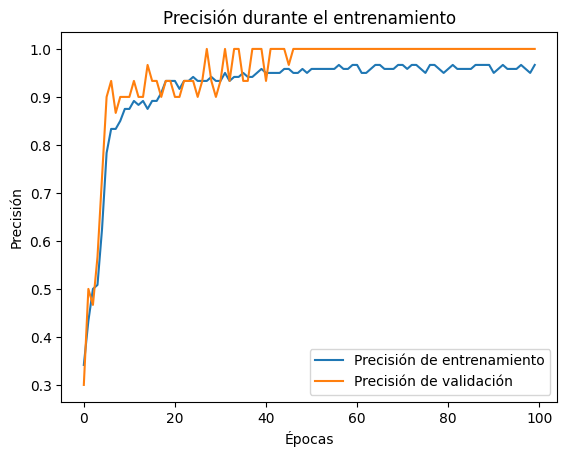

In [ ]:
# Visualizar la precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

In [ ]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [ ]:
# Obtener las predicciones finales
y_pred = predictions.argmax(axis=1)


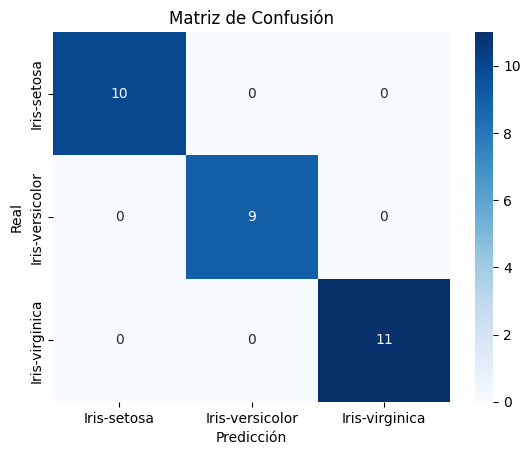

In [ ]:
# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()